## Exploratory Analysis on Sampled Distributions

The extended exploratory analysis completed last assignment revealed interesting properties about the data. Now, let's try some similar tests on graphs sampled randomly from various distributions.

Since we cannot sample weighted graphs, all of the analyses which relied upon edge weights could not be computed.

#### Setup

In [1]:
from scipy.stats import gaussian_kde
from ipywidgets import widgets

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import os

%matplotlib inline

In [31]:
S = 40
n = 70
p = 0.4

myer = {('er'+str(s)): nx.erdos_renyi_graph(n, p) for s in range(S)}
mydd = {('dd'+str(s)): nx.duplication_divergence_graph(n, p) for s in range(S)}
mypl = {('pl'+str(s)): nx.powerlaw_cluster_graph(n, int(n/3), p) for s in range(S)}
myba = {('ba'+str(s)): nx.barabasi_albert_graph(n, int(n/3)) for s in range(S)}
myrr = {('rr'+str(s)): nx.random_regular_graph(int(n/3), n) for s in range(S)}
myws = {('ws'+str(s)): nx.watts_strogatz_graph(n, int(n/3), p) for s in range(S)}
myls = {('ls'+str(s)): nx.random_lobster(n, 2*p, p) for s in range(S)}

mm = collections.OrderedDict()
mm["er"]=myer
mm["dd"]=mydd
mm["pl"]=mypl
mm["ba"]=myba
mm["rr"]=myrr
mm["ws"]=myws
mm["ls"]=myls

#### Number of Non-Zero (NNZ) edge weights

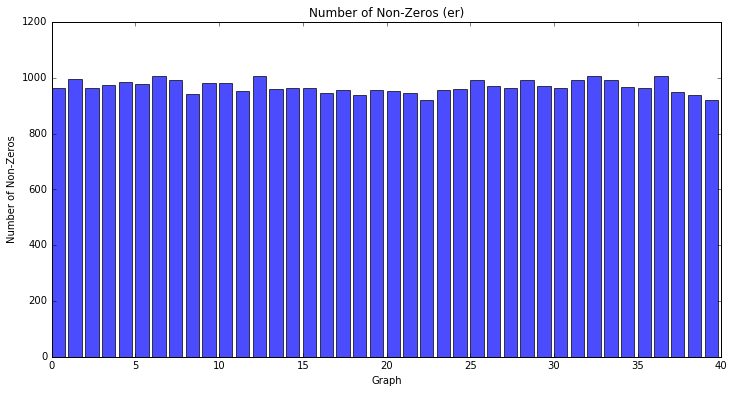

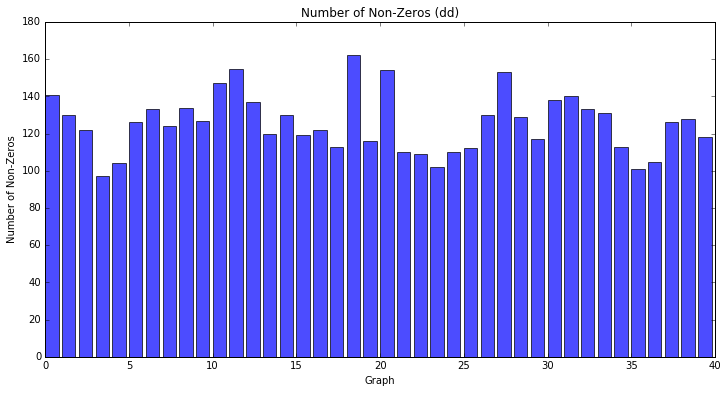

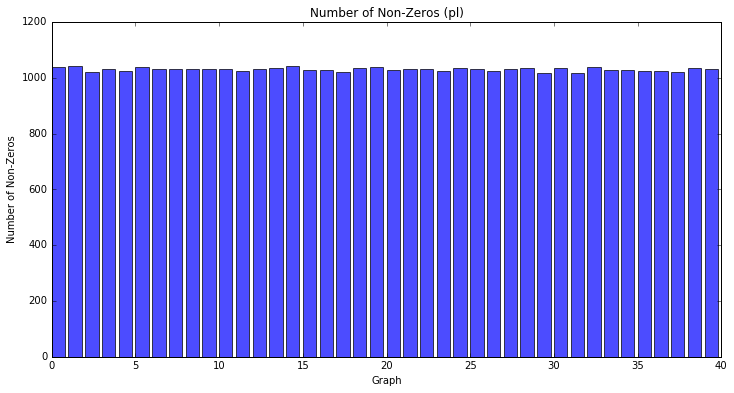

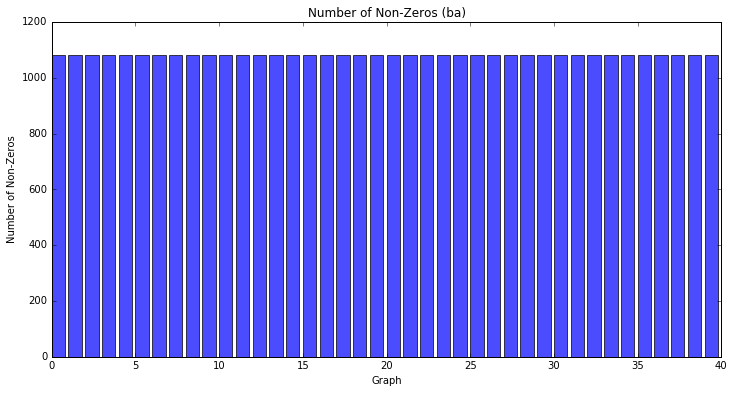

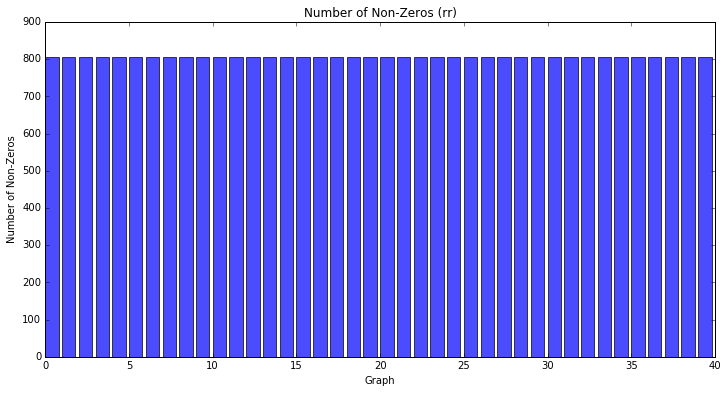

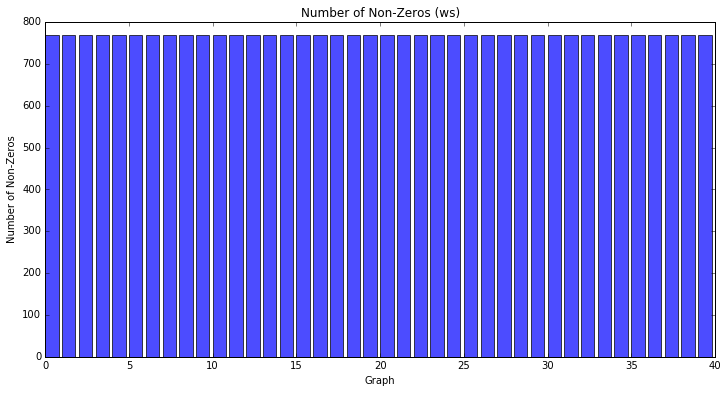

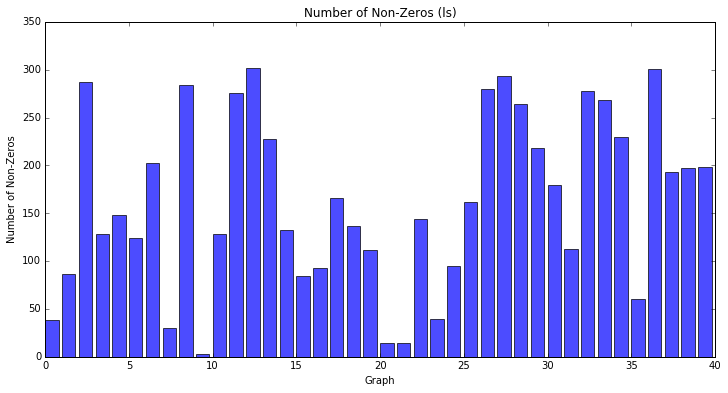

In [32]:
nnz = collections.OrderedDict()
for i in mm:
    nnz[i] = collections.OrderedDict((key, len(nx.edges(mm[i][key]))) for key in mm[i])
    fig = plt.figure(figsize=(12,6))
    plt.bar(range(len(nnz[i])),nnz[i].values(), alpha=0.7)
    plt.title('Number of Non-Zeros (' + i + ')')
    plt.ylabel('Number of Non-Zeros')
    plt.xlabel('Graph')
    plt.xlim((0, len(nnz[i].keys())))
    plt.show()

#### Vertex Degree

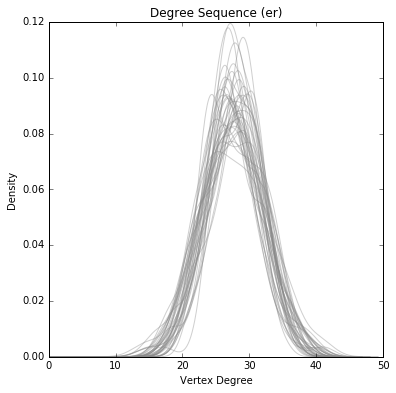

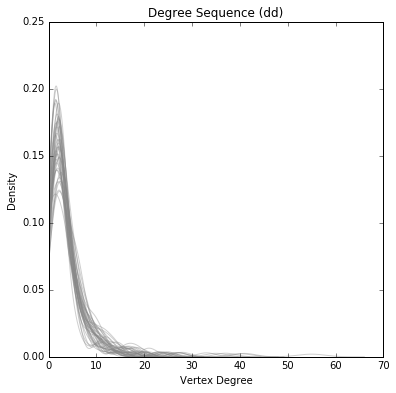

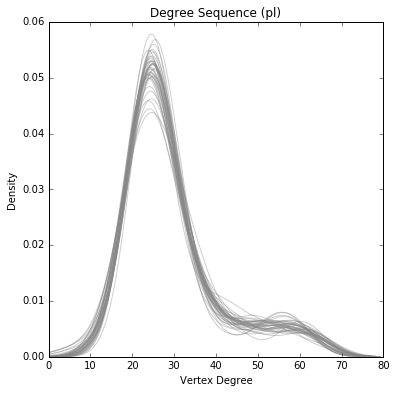

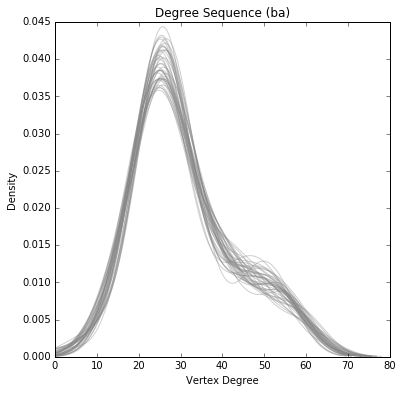

Failed to invert matrix...


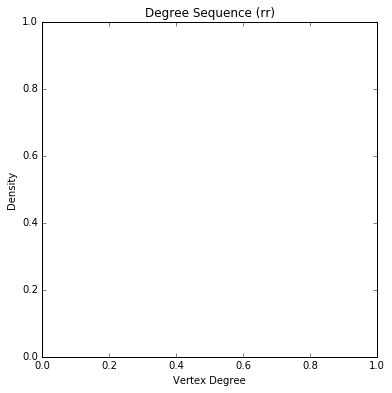

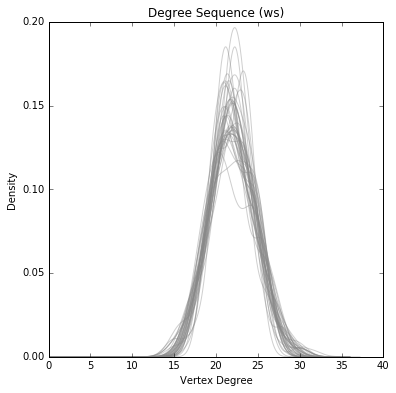

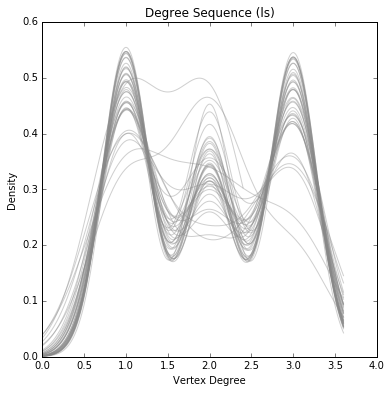

In [33]:
degrees = collections.OrderedDict()
for i in mm:
    degrees[i] = collections.OrderedDict((key, np.array(nx.degree(mm[i][key]).values())) for key in mm[i])
    fig = plt.figure(figsize=(6,6))
    plt.hold(True)
    for key in degrees[i].keys():
        try:
            dens = gaussian_kde(degrees[i][key])
        except: 
            print "Failed to invert matrix..."
            break
        x = np.linspace(0, 1.2*np.max(degrees[i][key]), 1000)
        plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
    plt.title('Degree Sequence (' + i + ')')
    plt.ylabel('Density')
    plt.xlabel('Vertex Degree')
    plt.show()

# avg_degrees = [np.mean(degrees[key]) for key in degrees]

#### Edge count

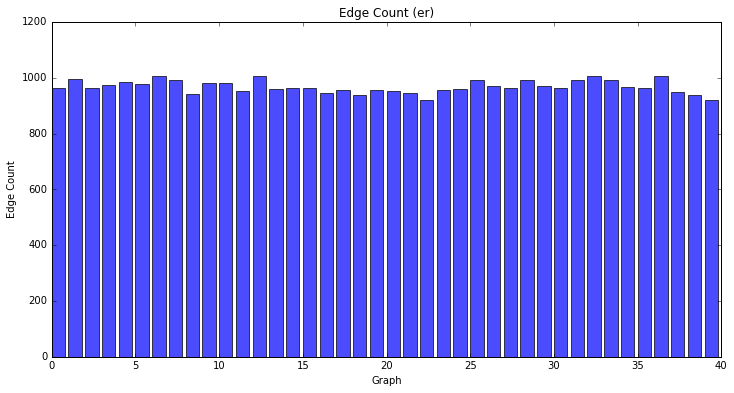

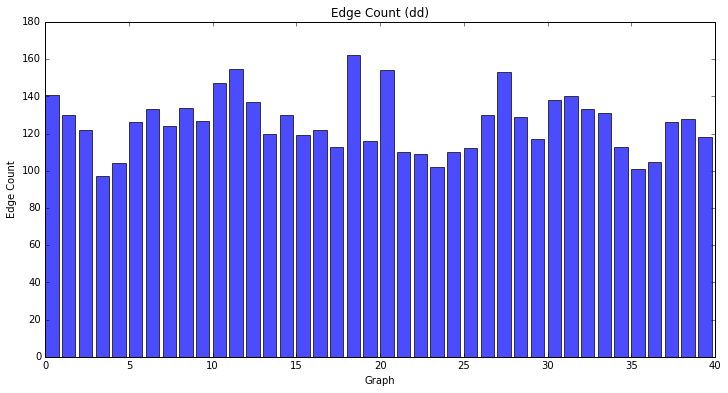

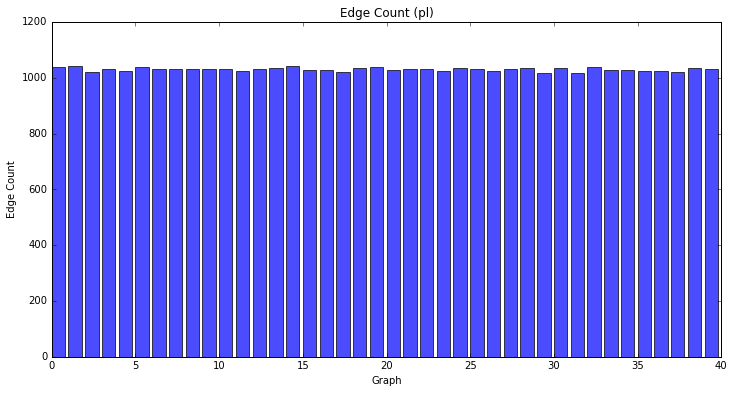

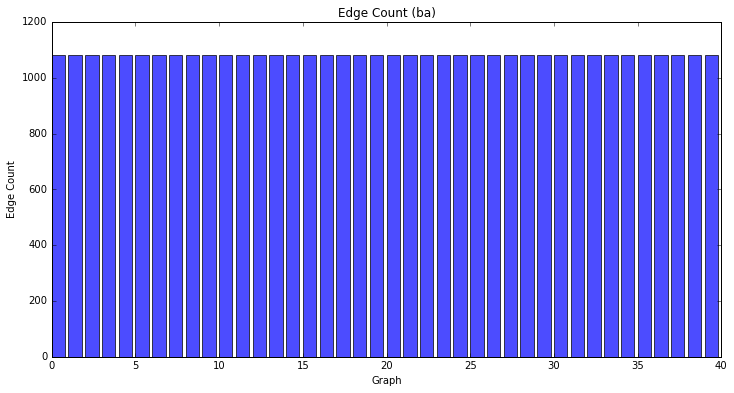

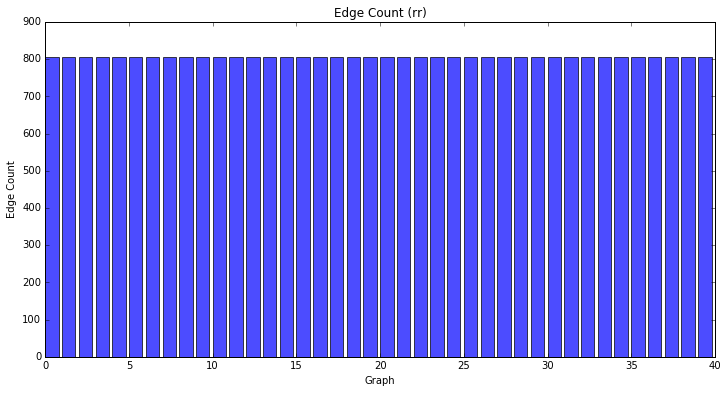

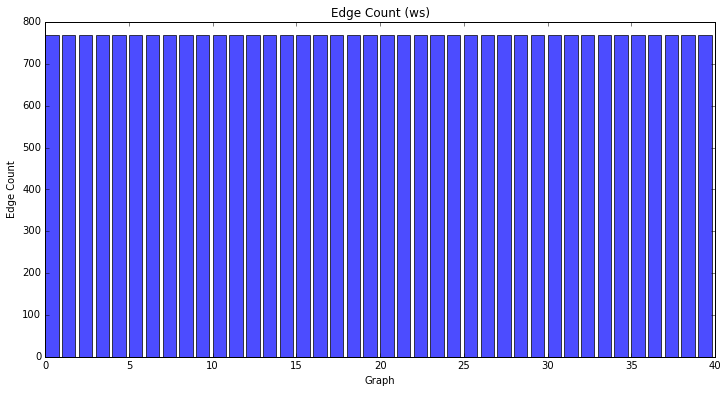

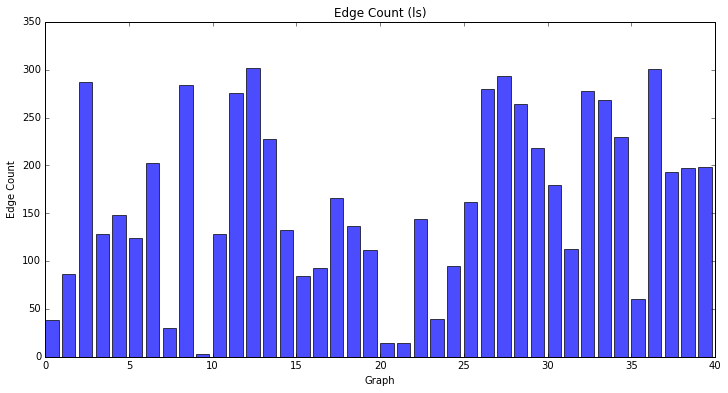

In [34]:
e_count = collections.OrderedDict()
for i in mm:
    e_count[i] = collections.OrderedDict((key, len(nx.edges(mm[i][key]))) for key in mm[i])
    fig = plt.figure(figsize=(12,6))
    plt.bar(range(len(e_count[i])),e_count[i].values(), alpha=0.7)
    plt.title('Edge Count (' + i + ')')
    plt.ylabel('Edge Count')
    plt.xlabel('Graph')
    plt.xlim((0, len(e_count[i].keys())))
    plt.show()

#### Number of Local 3-cliques

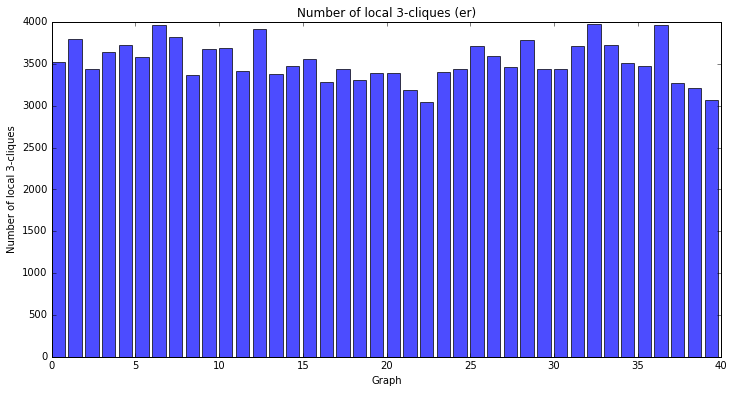

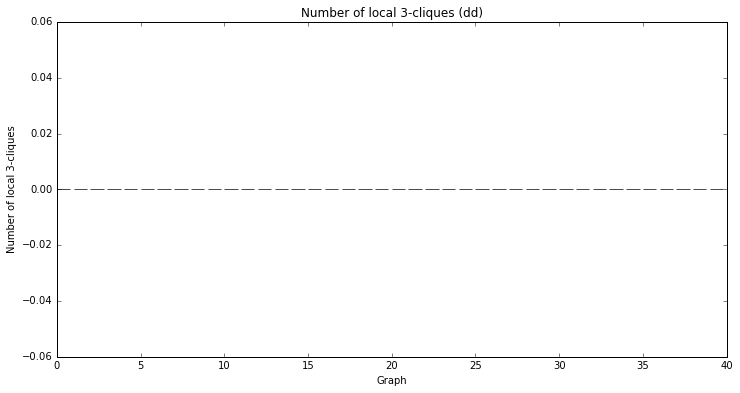

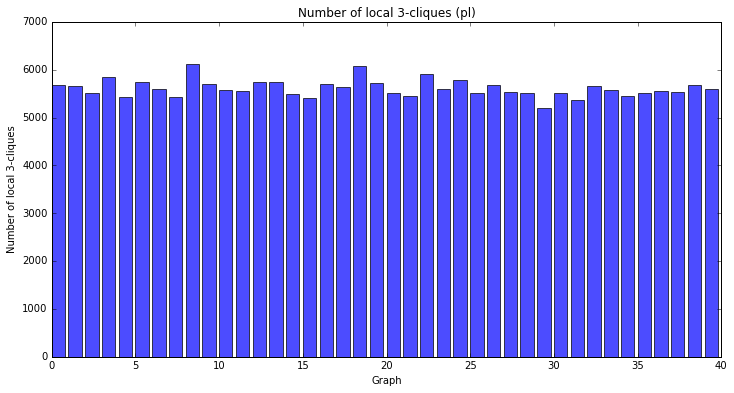

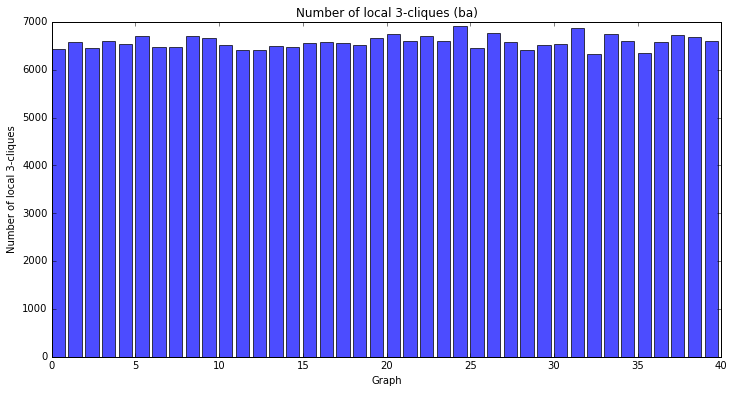

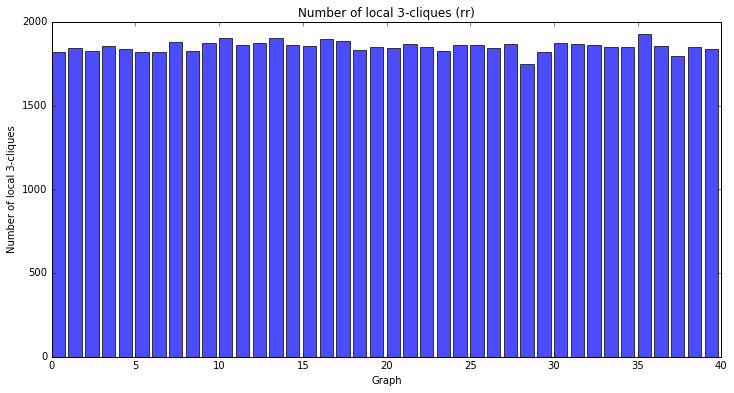

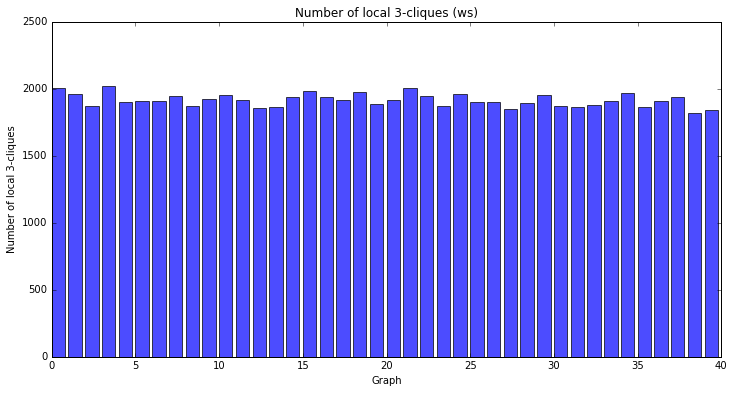

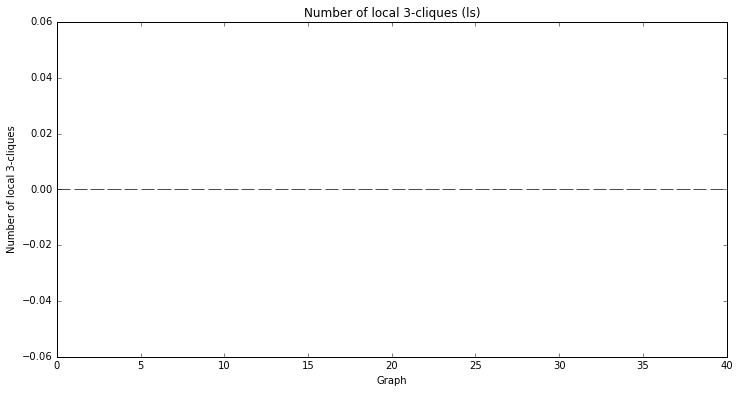

In [35]:
three_cliques = collections.OrderedDict()
for i in mm:
    three_cliques[i] = collections.OrderedDict((key, [clique for clique in
                       nx.algorithms.clique.enumerate_all_cliques(mm[i][key])
                       if len(clique) == 3]) for key in mm[i])
    n_three_cliques = [len(three_cliques[i][key]) for key in three_cliques[i]]
    fig = plt.figure(figsize=(12,6))
    plt.bar(range(len(n_three_cliques)),n_three_cliques, alpha=0.7)
    plt.title('Number of local 3-cliques (' + i + ')')
    plt.ylabel('Number of local 3-cliques')
    plt.xlabel('Graph')
    plt.xlim((0, len(three_cliques[i].keys())))
    plt.show()

#### Clustering Coefficient

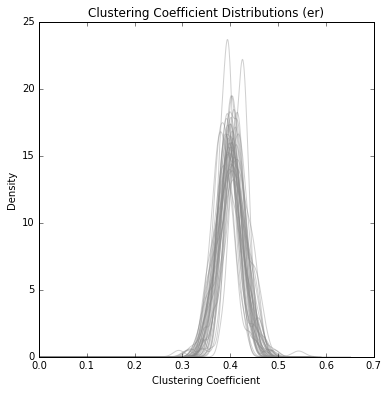

Failed to invert matrix...


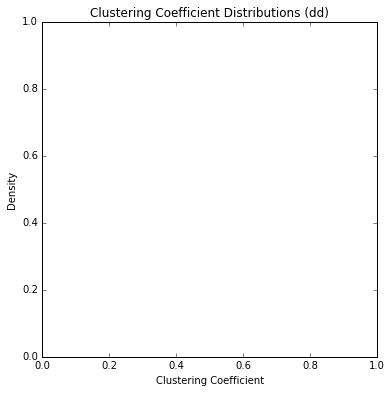

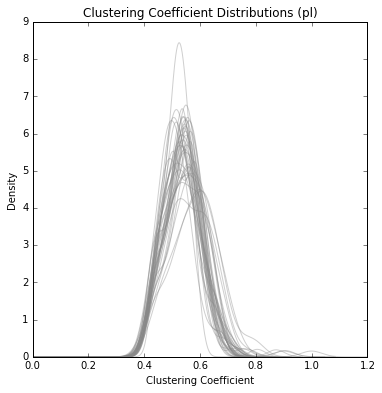

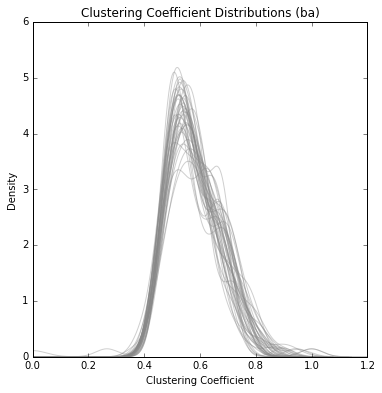

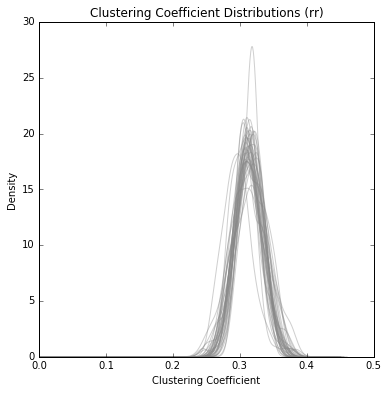

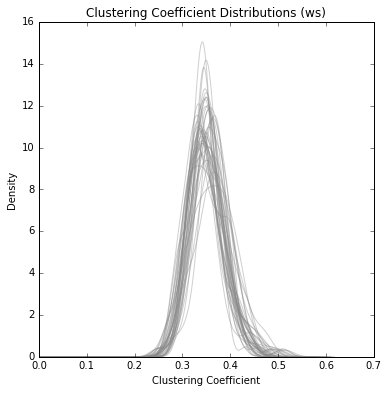

Failed to invert matrix...


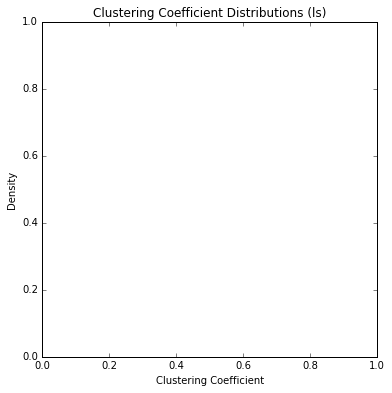

In [36]:
ccoefs = collections.OrderedDict()
for i in mm:
    ccoefs[i] = collections.OrderedDict((key, nx.clustering(mm[i][key]).values()) for key in mm[i])
    fig = plt.figure(figsize=(6,6))
    plt.hold(True)
    for key in ccoefs[i].keys():
        try:
            dens = gaussian_kde(ccoefs[i][key])
        except:
            print "Failed to invert matrix..."
            break
        x = np.linspace(0, 1.2*np.max(ccoefs[i][key]), 1000)
        plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
    plt.title('Clustering Coefficient Distributions (' + i + ')')
    plt.ylabel('Density')
    plt.xlabel('Clustering Coefficient')
    plt.show()

#### Eigen value

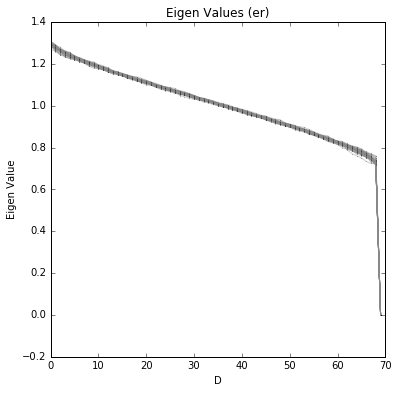

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


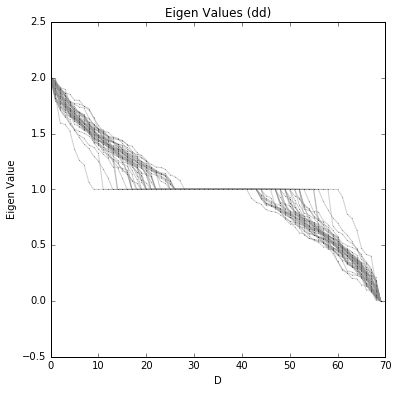

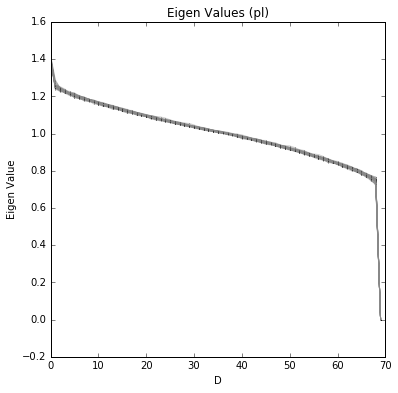

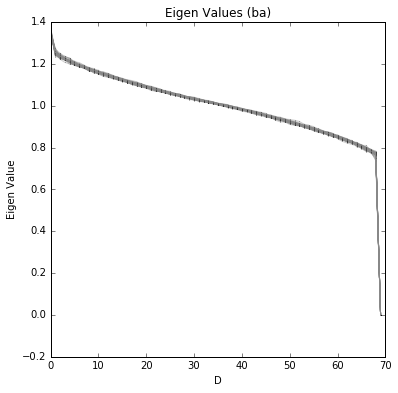

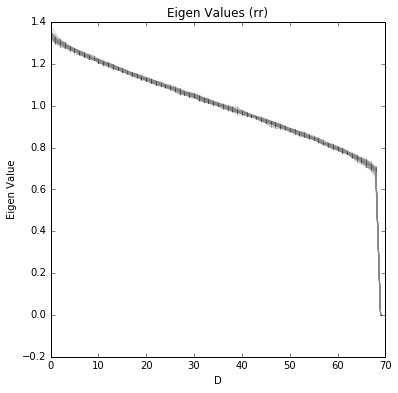

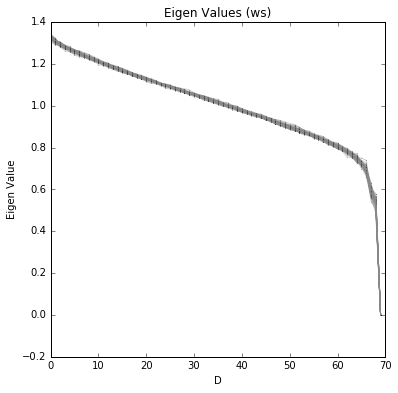

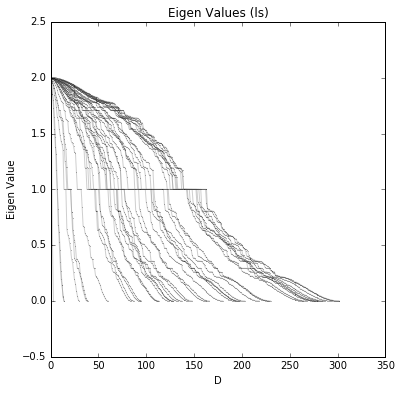

In [37]:
laplacian = collections.OrderedDict()
eigs = collections.OrderedDict()
for i in mm:
    laplacian[i] = collections.OrderedDict((key, nx.normalized_laplacian_matrix(mm[i][key])) for key in mm[i])
    eigs[i] = collections.OrderedDict((key, np.sort(np.linalg.eigvals(laplacian[i][key].A))[::-1]) for key in laplacian[i])
    fig = plt.figure(figsize=(6,6))
    plt.hold(True)
    for key in eigs[i].keys():
        plt.plot(eigs[i][key], 'ro-', markersize=0.4, color='#888888', alpha=0.4)
    plt.title('Eigen Values (' + i + ')')
    plt.ylabel('Eigen Value')
    plt.xlabel('D')
    plt.show()

#### Betweenness Centrality

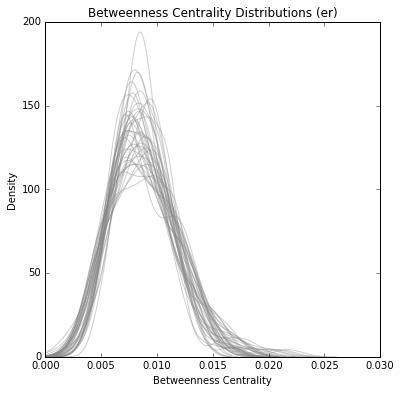

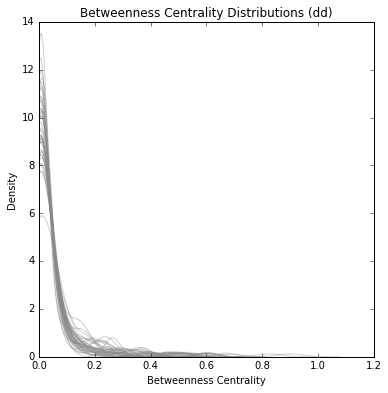

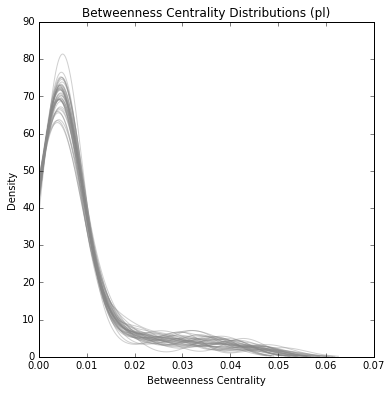

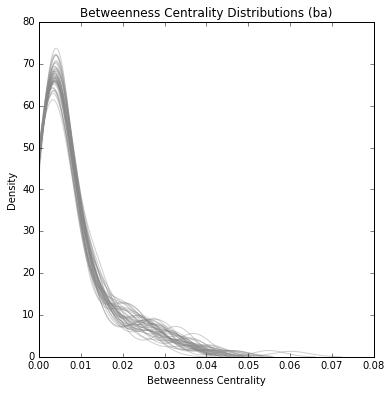

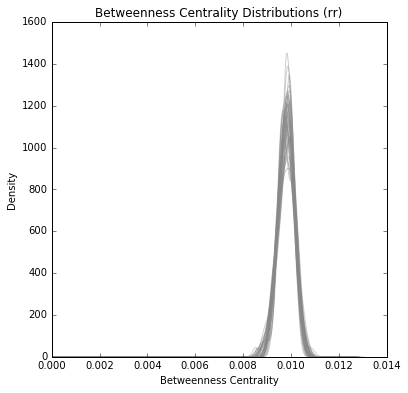

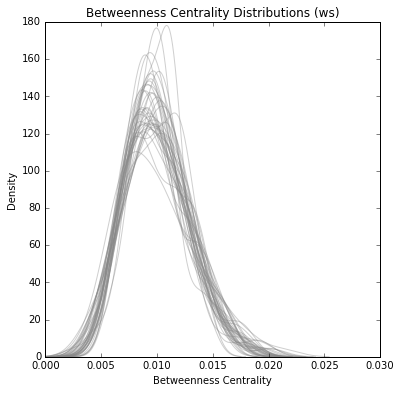

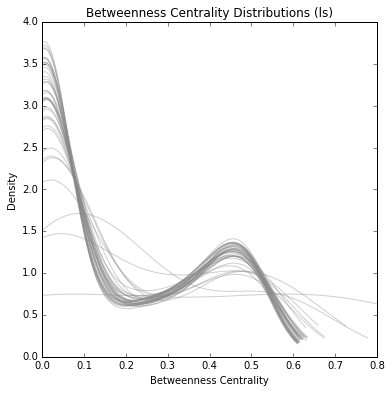

In [38]:
centrality = collections.OrderedDict()
for i in mm:
    centrality[i] = collections.OrderedDict((key, nx.algorithms.betweenness_centrality(mm[i][key]).values())
                                         for key in mm[i].keys())
    fig = plt.figure(figsize=(6,6))
    plt.hold(True)
    for key in centrality[i].keys():
        try:
            dens = gaussian_kde(centrality[i][key])
        except:
            print "Failed to invert matrix..."
            break
        x = np.linspace(0, 1.2*np.max(centrality[i][key]), 1000)
        plt.plot(x, dens.pdf(x), color='#888888', alpha=0.4)
    plt.title('Betweenness Centrality Distributions (' + i + ')')
    plt.ylabel('Density')
    plt.xlabel('Betweenness Centrality')
    plt.show()